##4CSE -  Tres Sigmas - DataViz-E 1 - Laboratory Activity: Multivariate Data Analysis with Python
Inventado, Charles Fredric G.

Rodelas, John Vincent B.

Valles, James Vincent V.


##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://drive.google.com/file/d/1qEmIcOgU1QDKpODdm8RNxU_RBvhIukgo/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

##Part 1: Explore the Dataset & Form Multivarate Questions


Load and inspect your dataset using pandas. List 2–3 analytical questions that require multivariate analysis. These questions should be addressable by at least one of the techniques listed in Part 2. Examples:

Can we identify a smaller number of underlying factors that explain the patterns in our customer survey responses?

How can we reduce the dimensionality of our large dataset of financial metrics while retaining the most important information?

Which combination of features best distinguishes between two different classes of products (e.g., low-risk vs. high-risk loans)?

In [ ]:
csv_gdrive = pd.read_csv(path)
csv_gdrive.head()

Real-World CO2 (g/mi)_noNull_scaled  Horsepower (HP)_noNull_scaled  \
0                             0.688846                       0.242445   
1                             0.632598                       0.238472   
2                             0.597150                       0.240062   
3                             0.568432                       0.227775   
4                             0.566479                       0.218185   

   Acceleration (0-60 time in seconds)_Scaled_noNull  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.510292   
4                                           0.547584   

   Weight(lbs)_scaled_noNull Manufacturer  Model Year (Renew)  \
0                   0.608856          All                1975   
1                   0.611675          All                1976   
2                   0.597073          All                1977   
3                   0.557099          All                1978   
4                   0.548136          All                1979   

  Regulatory Class Vehicle Type  Weight(lbs)_noNull  \
0              All          All            4060.399   
1              All          All            4079.198   
2              All          All            3981.818   
3              All          All            3715.238   
4              All          All            3655.465   

   Footprint (sq. ft.)_noNull  ...  \
0                         0.0  ...   
1                         0.0  ...   
2                         0.0  ...   
3                         0.0  ...   
4                         0.0  ...   

   Turbocharged Engine of Gasoline ICE Vehicles_noNull  2-Cycle MPG_noNull  \
0                                                0.0              15.33300   
1                                                0.0              16.70719   
2                                                0.0              17.70553   
3                                                0.0              18.60678   
4                                                0.0              18.69594   

   Real-World MPG_noNull  Real-World MPG_City_noNull  \
0               13.05970                    12.01552   
1               14.22136                    13.18117   
2               15.06743                    14.00580   
3               15.83777                    14.68193   
4               15.91271                    14.87711   

   Real-World MPG_Hwy_noNull  Real-World CO2 (g/mi)_noNull  \
0                   14.61167                     680.59612   
1                   15.73946                     625.02238   
2                   16.60587                     589.99880   
3                   17.52390                     561.62442   
4                   17.39245                     559.69495   

   Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                          739.73800                         608.31160   
1                          674.34147                         564.74348   
2                          634.71366                         535.34732   
3                          605.82637                         507.59981   
4                          598.63764                         512.09833   

   Acceleration (0-60 time in seconds)_noNull  Ton-MPG (Real-World)_NoNull  
0                                      0.0000                     26.90068  
1                                      0.0000                     29.32518  
2                                      0.0000                     30.37961  
3                                     13.6221                     29.88164  
4                                     14.6176                     29.52594  

[5 rows x 25 columns]

Problems that can be resolved using Multivariate analysis techniques:

1. Determine how vehicle characteristics such as Horsepower, Weight, and Acceleration could influence fuel efficiency such as Real-World MPG and CO2 emissions such as Real-World CO2 g/mi, and identify underlying dimensions that represent these combined impacts.
2. Find ways to possibly reduce the complexity of vehicle performance and environmental metrics into a smaller set of key indicators that are most relevant to understanding progress towards clean energy (SDG7) and climate action goals (SDG13).
3. Figure a combination of vehicle specifications and environmental data,  differentiate these vehicles that align better with sustainable transportation objectives such as lower emissions, and higher MPG, and those that do not.

### Question 1: Underlying factors influencing fuel efficiency and CO2 emissions - Relevant Columns
Explore dataset , find factors strong correlated to fuel efficiency and CO2 emissions.

In [ ]:
# Columns relevant to Question 1
cols_q1 = ['Horsepower (HP)_noNull', # Changed to non-scaled
           'Weight(lbs)_noNull', # Changed to non-scaled
           'Acceleration (0-60 time in seconds)_noNull', # Changed to non-scaled
           'Real-World CO2 (g/mi)_noNull_scaled',
           'Real-World MPG_noNull',
           'Real-World MPG_City_noNull',
           'Real-World MPG_Hwy_noNull',
           'Real-World CO2_City (g/mi)_noNull',
           'Real-World CO2_Hwy (g/mi)_noNull',
           'Ton-MPG (Real-World)_NoNull'] # Removed scaled acceleration as non-scaled is used

print("Relevant columns for Question 1:")
display(csv_gdrive[cols_q1].head())
display(csv_gdrive[cols_q1].describe())

Relevant columns for Question 1:


Horsepower (HP)_noNull  Weight(lbs)_noNull  \
0                137.3346            4060.399   
1                135.0839            4079.198   
2                135.9847            3981.818   
3                129.0248            3715.238   
4                123.5922            3655.465   

   Acceleration (0-60 time in seconds)_noNull  \
0                                      0.0000   
1                                      0.0000   
2                                      0.0000   
3                                     13.6221   
4                                     14.6176   

   Real-World CO2 (g/mi)_noNull_scaled  Real-World MPG_noNull  \
0                             0.688846               13.05970   
1                             0.632598               14.22136   
2                             0.597150               15.06743   
3                             0.568432               15.83777   
4                             0.566479               15.91271   

   Real-World MPG_City_noNull  Real-World MPG_Hwy_noNull  \
0                    12.01552                   14.61167   
1                    13.18117                   15.73946   
2                    14.00580                   16.60587   
3                    14.68193                   17.52390   
4                    14.87711                   17.39245   

   Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                          739.73800                         608.31160   
1                          674.34147                         564.74348   
2                          634.71366                         535.34732   
3                          605.82637                         507.59981   
4                          598.63764                         512.09833   

   Ton-MPG (Real-World)_NoNull  
0                     26.90068  
1                     29.32518  
2                     30.37961  
3                     29.88164  
4                     29.52594

Horsepower (HP)_noNull  Weight(lbs)_noNull  \
count             5500.000000         5500.000000   
mean               145.534697         2988.433975   
std                 99.689379         1712.674922   
min                  0.000000            0.000000   
25%                 76.528850         2556.901000   
50%                155.685450         3554.379000   
75%                209.258150         4144.161250   
max                566.456600         6668.898000   

       Acceleration (0-60 time in seconds)_noNull  \
count                                 5500.000000   
mean                                     7.568808   
std                                      5.091067   
min                                      0.000000   
25%                                      0.000000   
50%                                      8.664400   
75%                                     10.422125   
max                                     26.694700   

       Real-World CO2 (g/mi)_noNull_scaled  Real-World MPG_noNull  \
count                          5500.000000            5500.000000   
mean                              0.330514              17.989161   
std                               0.202399              13.902505   
min                               0.000000               0.000000   
25%                               0.275973              14.298610   
50%                               0.385074              19.975710   
75%                               0.460574              23.825935   
max                               1.000000             129.831470   

       Real-World MPG_City_noNull  Real-World MPG_Hwy_noNull  \
count                 5500.000000                5500.000000   
mean                    15.938458                  20.324329   
std                     13.479652                  14.628269   
min                      0.000000                   0.000000   
25%                     12.958960                  15.824652   
50%                     17.264180                  22.972410   
75%                     20.911538                  27.493060   
max                    137.749320                 124.435660   

       Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
count                        5500.000000                       5500.000000   
mean                          371.989914                        286.972846   
std                           225.498100                        177.523111   
min                             0.000000                          0.000000   
25%                           312.114903                        242.142925   
50%                           436.587025                        328.459790   
75%                           526.290175                        397.304500   
max                          1110.602930                        926.868380   

       Ton-MPG (Real-World)_NoNull  
count                  5500.000000  
mean                     35.132419  
std                      30.900407  
min                       0.000000  
25%                      27.721690  
50%                      37.068930  
75%                      45.262050  
max                     281.994470

### Question 2: Reducing dimensionality of performance and environmental metrics

Explore relevant columns for the question similar to Question 1 as we are looking to reduce the complexity or dimensionality of these metrics.

In [ ]:
# Columns relevant to Question 2 are the same as Question 1 for dimensionality reduction purposes,
# using non-scaled versions for interpretability as requested.
cols_q2 = ['Horsepower (HP)_noNull', # Changed to non-scaled
           'Weight(lbs)_noNull', # Changed to non-scaled
           'Acceleration (0-60 time in seconds)_noNull', # Changed to non-scaled
           'Real-World CO2 (g/mi)_noNull_scaled',
           'Real-World MPG_noNull',
           'Real-World MPG_City_noNull',
           'Real-World MPG_Hwy_noNull',
           'Real-World CO2_City (g/mi)_noNull',
           'Real-World CO2_Hwy (g/mi)_noNull',
           'Ton-MPG (Real-World)_NoNull'] # Removed scaled acceleration as non-scaled is used

print("Relevant columns for Question 2:")
display(csv_gdrive[cols_q2].head())
display(csv_gdrive[cols_q2].describe())

Relevant columns for Question 2:


Horsepower (HP)_noNull  Weight(lbs)_noNull  \
0                137.3346            4060.399   
1                135.0839            4079.198   
2                135.9847            3981.818   
3                129.0248            3715.238   
4                123.5922            3655.465   

   Acceleration (0-60 time in seconds)_noNull  \
0                                      0.0000   
1                                      0.0000   
2                                      0.0000   
3                                     13.6221   
4                                     14.6176   

   Real-World CO2 (g/mi)_noNull_scaled  Real-World MPG_noNull  \
0                             0.688846               13.05970   
1                             0.632598               14.22136   
2                             0.597150               15.06743   
3                             0.568432               15.83777   
4                             0.566479               15.91271   

   Real-World MPG_City_noNull  Real-World MPG_Hwy_noNull  \
0                    12.01552                   14.61167   
1                    13.18117                   15.73946   
2                    14.00580                   16.60587   
3                    14.68193                   17.52390   
4                    14.87711                   17.39245   

   Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                          739.73800                         608.31160   
1                          674.34147                         564.74348   
2                          634.71366                         535.34732   
3                          605.82637                         507.59981   
4                          598.63764                         512.09833   

   Ton-MPG (Real-World)_NoNull  
0                     26.90068  
1                     29.32518  
2                     30.37961  
3                     29.88164  
4                     29.52594

Horsepower (HP)_noNull  Weight(lbs)_noNull  \
count             5500.000000         5500.000000   
mean               145.534697         2988.433975   
std                 99.689379         1712.674922   
min                  0.000000            0.000000   
25%                 76.528850         2556.901000   
50%                155.685450         3554.379000   
75%                209.258150         4144.161250   
max                566.456600         6668.898000   

       Acceleration (0-60 time in seconds)_noNull  \
count                                 5500.000000   
mean                                     7.568808   
std                                      5.091067   
min                                      0.000000   
25%                                      0.000000   
50%                                      8.664400   
75%                                     10.422125   
max                                     26.694700   

       Real-World CO2 (g/mi)_noNull_scaled  Real-World MPG_noNull  \
count                          5500.000000            5500.000000   
mean                              0.330514              17.989161   
std                               0.202399              13.902505   
min                               0.000000               0.000000   
25%                               0.275973              14.298610   
50%                               0.385074              19.975710   
75%                               0.460574              23.825935   
max                               1.000000             129.831470   

       Real-World MPG_City_noNull  Real-World MPG_Hwy_noNull  \
count                 5500.000000                5500.000000   
mean                    15.938458                  20.324329   
std                     13.479652                  14.628269   
min                      0.000000                   0.000000   
25%                     12.958960                  15.824652   
50%                     17.264180                  22.972410   
75%                     20.911538                  27.493060   
max                    137.749320                 124.435660   

       Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
count                        5500.000000                       5500.000000   
mean                          371.989914                        286.972846   
std                           225.498100                        177.523111   
min                             0.000000                          0.000000   
25%                           312.114903                        242.142925   
50%                           436.587025                        328.459790   
75%                           526.290175                        397.304500   
max                          1110.602930                        926.868380   

       Ton-MPG (Real-World)_NoNull  
count                  5500.000000  
mean                     35.132419  
std                      30.900407  
min                       0.000000  
25%                      27.721690  
50%                      37.068930  
75%                      45.262050  
max                     281.994470

### Question 3: Differentiating vehicles based on sustainability objectives

Explore Relevant columns for this question include vehicle specifications, environmental data (same as Q1 and Q2), and categorical variables like 'Regulatory Class' and 'Vehicle Type' to differentiate groups.

In [ ]:
# Columns relevant to Question 3
cols_q3 = ['Horsepower (HP)_noNull', # Changed to non-scaled
           'Weight(lbs)_noNull', # Changed to non-scaled
           'Acceleration (0-60 time in seconds)_noNull', # Changed to non-scaled
           'Real-World CO2 (g/mi)_noNull_scaled',
           'Real-World MPG_noNull',
           'Real-World MPG_City_noNull',
           'Real-World MPG_Hwy_noNull',
           'Real-World CO2_City (g/mi)_noNull',
           'Real-World CO2_Hwy (g/mi)_noNull',
           'Ton-MPG (Real-World)_NoNull',
           'Regulatory Class',
           'Vehicle Type']

print("Relevant columns for Question 3:")
display(csv_gdrive[cols_q3].head())

print("\nValue counts for Categorical Columns (Regulatory Class and Vehicle Type):")
display(csv_gdrive['Regulatory Class'].value_counts())
display(csv_gdrive['Vehicle Type'].value_counts())

Relevant columns for Question 3:


Horsepower (HP)_noNull  Weight(lbs)_noNull  \
0                137.3346            4060.399   
1                135.0839            4079.198   
2                135.9847            3981.818   
3                129.0248            3715.238   
4                123.5922            3655.465   

   Acceleration (0-60 time in seconds)_noNull  \
0                                      0.0000   
1                                      0.0000   
2                                      0.0000   
3                                     13.6221   
4                                     14.6176   

   Real-World CO2 (g/mi)_noNull_scaled  Real-World MPG_noNull  \
0                             0.688846               13.05970   
1                             0.632598               14.22136   
2                             0.597150               15.06743   
3                             0.568432               15.83777   
4                             0.566479               15.91271   

   Real-World MPG_City_noNull  Real-World MPG_Hwy_noNull  \
0                    12.01552                   14.61167   
1                    13.18117                   15.73946   
2                    14.00580                   16.60587   
3                    14.68193                   17.52390   
4                    14.87711                   17.39245   

   Real-World CO2_City (g/mi)_noNull  Real-World CO2_Hwy (g/mi)_noNull  \
0                          739.73800                         608.31160   
1                          674.34147                         564.74348   
2                          634.71366                         535.34732   
3                          605.82637                         507.59981   
4                          598.63764                         512.09833   

   Ton-MPG (Real-World)_NoNull Regulatory Class Vehicle Type  
0                     26.90068              All          All  
1                     29.32518              All          All  
2                     30.37961              All          All  
3                     29.88164              All          All  
4                     29.52594              All          All


Value counts for Categorical Columns (Regulatory Class and Vehicle Type):


Regulatory Class
Truck    2550
Car      2200
All       750
Name: count, dtype: int64

Vehicle Type
All            750
All Car        750
All Truck      750
Truck SUV      750
Sedan/Wagon    750
Car SUV        700
Minivan/Van    550
Pickup         500
Name: count, dtype: int64

##Part 2: Choose Analysis Techniques & Justify

For each question, choose one or more appropriate analysis techniques and briefly explain your choice. Use 4-5 distinct techniques from the list below.

- Scatter Plot Matrix: An excellent first step for visualizing pairwise relationships between multiple continuous variables. It helps quickly identify potential correlations or lack thereof.

- Principal Components Analysis (PCA): A dimensionality reduction technique used to transform a large set of correlated variables into a smaller set of uncorrelated variables (principal components). It is ideal for summarizing data while preserving as much variance as possible.

- Factor Analysis (FA): A statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. It is useful for finding hidden, conceptual factors (e.g., "customer satisfaction") from a set of measurable variables.

- Discriminant Analysis (DA): A classification technique used to find a linear combination of features that best separates two or more classes. It is useful for building a predictive model for group membership.

- ICON-BASED Visualizations
- Color-based Visualizations
- Parallel Coordinates Plot
- Trellis Display

##For MVDA Q1

###Analysis Technique # 1 : Factor Analysis (FA)

Explanation on the use of the specific analysis technique : Factor Analysis is suitable for Question 1 because as the approach can help identify underlying latent factors that can explain the correlations these vehicle specifications and their environmental impact. The technique can group related variables together into fewer factors, better explainability while reducing the complexity on understanding these relationships between variables.

###Analysis Technique # 2 : Scatter Plot Matrix

Explanation on the use of the specific analysis technique : A Scatter Plot Matrix is useful for Question 1 to visualize the pairwise relationships between two numerical variables related to vehicle specifications and environmental metrics. The approach helps in identifying potential linear or non-linear correlations just by observation before applying more complex techniques like Factor Analysis.

##For MVDA Q2

###Analysis Technique # 3 : Principal Components Analysis (PCA)

Explanation on the use of the specific analysis technique : Regarding Q2, PCA is a  dimensionality reduction technique by reducing the original set of identified correlated features into a smaller set of uncorrelated principal components. The dimensionality reduction allows us to retain most of the important information (with minimum variance) in the dataset with fewer variables, simplifying the further analysis and visualization.

###Analysis Technique # 4 : Parallel Coordinates Plot

Explanation on the use of the specific analysis technique : A Parallel Coordinates Plot helps to visualize the relationships between multiple features simultaneously such as using 3 or more variables. Parallel coordinates plot allows for the identification of patterns and clusters in the data after dimensionality reduction with PCA, helping to understand how different vehicles perform across the reduced set of components.

##For MVDA Q3

###Analysis Technique # 5 : Discriminant Analysis (DA)

Explanation on the use of the specific analysis technique : Using Discriminant Analysis is appropriate for Question 3 to help classify and find a linear combination of features that best separates different vehicle types or regulatory classes. The approach helps in building a classification model to predict the regulatory class of a vehicle based on the specifications and environmental metrics.

###Analysis Technique # 6 : Color-based Visualizations

Regards to Explanation on the use of the specific analysis technique : Color-based visualizations can be used in combination with techniques such as Discriminant Analysis for Question 3 to visually represent the separation of different vehicle types or regulatory classes in a scatter plot of the discriminant functions. Using different colors for each class helps visually distinguish between the groups or datapoints.

##Part 3: Conduct the Analysis & Build Visualizations in Python


Use libraries such as:

- pandas for data manipulation

- scikit-learn for PCA, Factor Analysis, and Discriminant Analysis

- matplotlib or seaborn for visualizations

- pingouin or factor_analyzer for Bartlett's Test and KMO

✅ For Factor Analysis and PCA, you must include a preliminary test:

- Bartlett's Test of Sphericity: Tests the hypothesis that your variables are uncorrelated in the population. A significant p\-value (< 0.05) indicates that the data is suitable for factor analysis.

- Kaiser-Meyer-Olkin (KMO) Test: Measures the proportion of variance among variables that might be common variance. A KMO value > 0.6 is generally considered a good sign that the data is suitable for factor analysis.

✅ For each visualization, ensure it includes:

- Clear titles and axis labels

- Appropriate color schemes

- Legends (if needed)

##For MVDA Q1

###Chart # 1 Visualization - Preliminaries + Factor Analysis - To what extent do these original variables contribute to the defined latent factors?


In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Select relevant columns for Factor Analysis (Question 1)
# Use non-scaled versions for Horsepower, Weight, and Acceleration as requested
fa_data = csv_gdrive[['Horsepower (HP)_noNull',
                      'Weight(lbs)_noNull',
                      'Acceleration (0-60 time in seconds)_noNull',
                      'Real-World CO2 (g/mi)_noNull', # Changed to non-scaled
                      'Real-World MPG_noNull',
                      'Real-World MPG_City_noNull',
                      'Real-World MPG_Hwy_noNull',
                      'Real-World CO2_City (g/mi)_noNull',
                      'Real-World CO2_Hwy (g/mi)_noNull',
                      'Ton-MPG (Real-World)_NoNull']]

# Drop rows with NaN values for these columns
fa_data = fa_data.dropna()

# Perform Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(fa_data)
print(f"Bartlett's Test of Sphericity:")
print(f"Chi-square value: {chi_square_value}")
print(f"P-value: {p_value}")
# A significant p-value (typically < 0.05) indicates that the variables are correlated and suitable for PCA/Factor Analysis.
# A large chi-square value is expected with correlated variables.

Bartlett's Test of Sphericity:
Chi-square value: 206049.3854698403
P-value: 0.0


In [ ]:
# Perform Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(fa_data)
print(f"\nKaiser-Meyer-Olkin (KMO) Test:")
print(f"KMO value: {kmo_model}")
# A KMO value > 0.6 is generally considered good for PCA/Factor Analysis.


Kaiser-Meyer-Olkin (KMO) Test:
KMO value: 0.6087780153705892



Data is suitable for Factor Analysis. Performing Factor Analysis...

Factor Loadings:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0         1         2  \
Horsepower (HP)_noNull                      0.579043  0.504455  0.615825   
Weight(lbs)_noNull                          0.454257  0.776072  0.416652   
Acceleration (0-60 time in seconds)_noNull  0.294175  0.612073 -0.024565   
Real-World CO2 (g/mi)_noNull                0.135556  0.979660  0.087410   
Real-World MPG_noNull                       0.968757  0.186499  0.084781   
Real-World MPG_City_noNull                  0.982573  0.140964  0.029094   
Real-World MPG_Hwy_noNull                   0.944562  0.232610  0.122086   
Real-World CO2_City (g/mi)_noNull           0.141562  0.970814  0.143917   
Real-World CO2_Hwy (g/mi)_noNull            0.131961  0.980659  0.060128   
Ton-MPG (Real-World)_NoNull                 0.943938  0.142708  0.245375   

                                                   3         4  
Horsepower (HP)_noNull                     -0.060339 -0.010214  
Weight(lbs)_noNull                          0.108550  0.037874  
Acceleration (0-60 time in seconds)_noNull  0.636099 -0.002377  
Real-World CO2 (g/mi)_noNull                0.111536 -0.004434  
Real-World MPG_noNull                       0.126945 -0.041155  
Real-World MPG_City_noNull                  0.096949  0.014820  
Real-World MPG_Hwy_noNull                   0.158857 -0.097424  
Real-World CO2_City (g/mi)_noNull           0.106357 -0.041038  
Real-World CO2_Hwy (g/mi)_noNull            0.113407  0.026634  
Ton-MPG (Real-World)_NoNull                -0.011547  0.131023


Variance Explained by Factors:


Variance  Proportional Variance  Cumulative Variance
0  4.371166               0.437117             0.437117
1  4.224427               0.422443             0.859559
2  0.668559               0.066856             0.926415
3  0.507542               0.050754             0.977169
4  0.032529               0.003253             0.980422

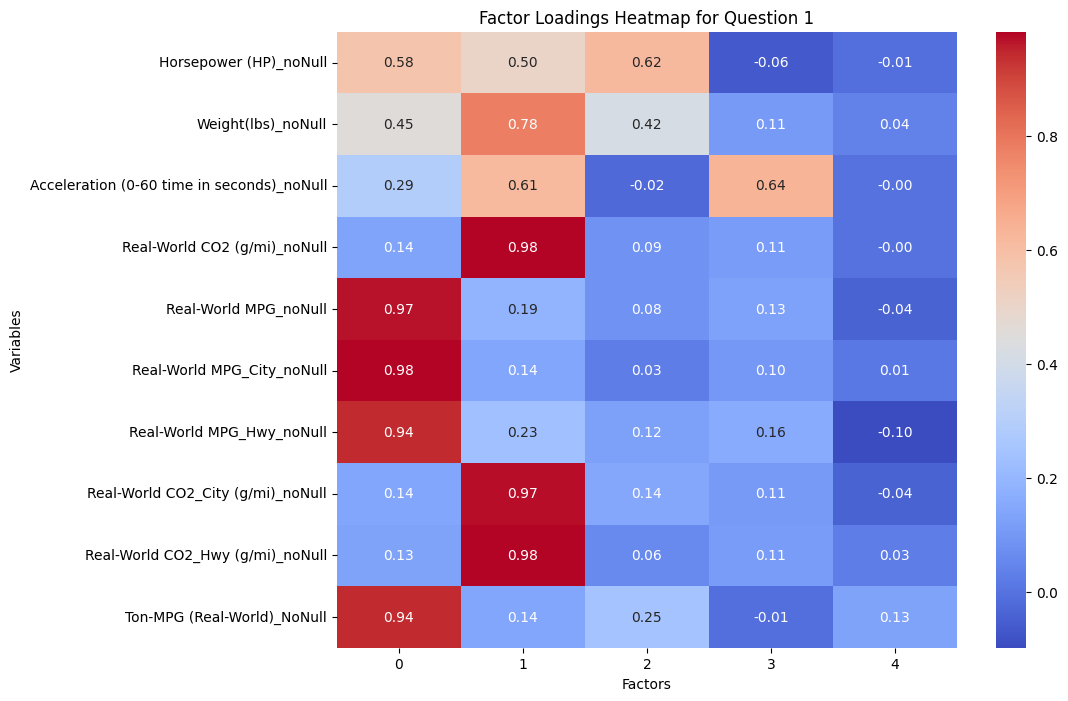

In [ ]:
# Proceed with Factor Analysis if tests indicate suitability (p-value < 0.05 and KMO > 0.6)
if p_value is not None and not pd.isna(p_value) and p_value < 0.05 and kmo_model > 0.6:
    print("\nData is suitable for Factor Analysis. Performing Factor Analysis...")
    # Initialize and fit the Factor Analyzer
    # Determine the number of factors to retain - can be adjusted based on eigenvalue analysis
    fa = FactorAnalyzer(n_factors=5, rotation='varimax') # Example: retaining 5 factors with Varimax rotation
    fa.fit(fa_data)

    # Get the factor loadings
    loadings = pd.DataFrame(fa.loadings_, index=fa_data.columns)
    print("\nFactor Loadings:")
    display(loadings)

    # Get variance explained by each factor
    variance_explained = pd.DataFrame({'Variance': fa.get_factor_variance()[0],
                                      'Proportional Variance': fa.get_factor_variance()[1],
                                      'Cumulative Variance': fa.get_factor_variance()[2]})
    print("\nVariance Explained by Factors:")
    display(variance_explained)

    # Visualize factor loadings with a heatmap (Chart #1 for Question 1)
    plt.figure(figsize=(10, 8))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Factor Loadings Heatmap for Question 1')
    plt.xlabel('Factors')
    plt.ylabel('Variables')
    plt.show()
else:
    print("\nData may not be suitable for Factor Analysis based on preliminary tests.")
    if p_value is None or pd.isna(p_value) or p_value >= 0.05:
        print("Bartlett's Test of Sphericity did not pass (p-value is not < 0.05).")
    if kmo_model <= 0.6:
        print("Kaiser-Meyer-Olkin (KMO) Test did not pass (KMO value is not > 0.6).")

###Chart # 2 Visualization - Scatter Plot - Finding correlations on Vehicle Features and Environmental variables


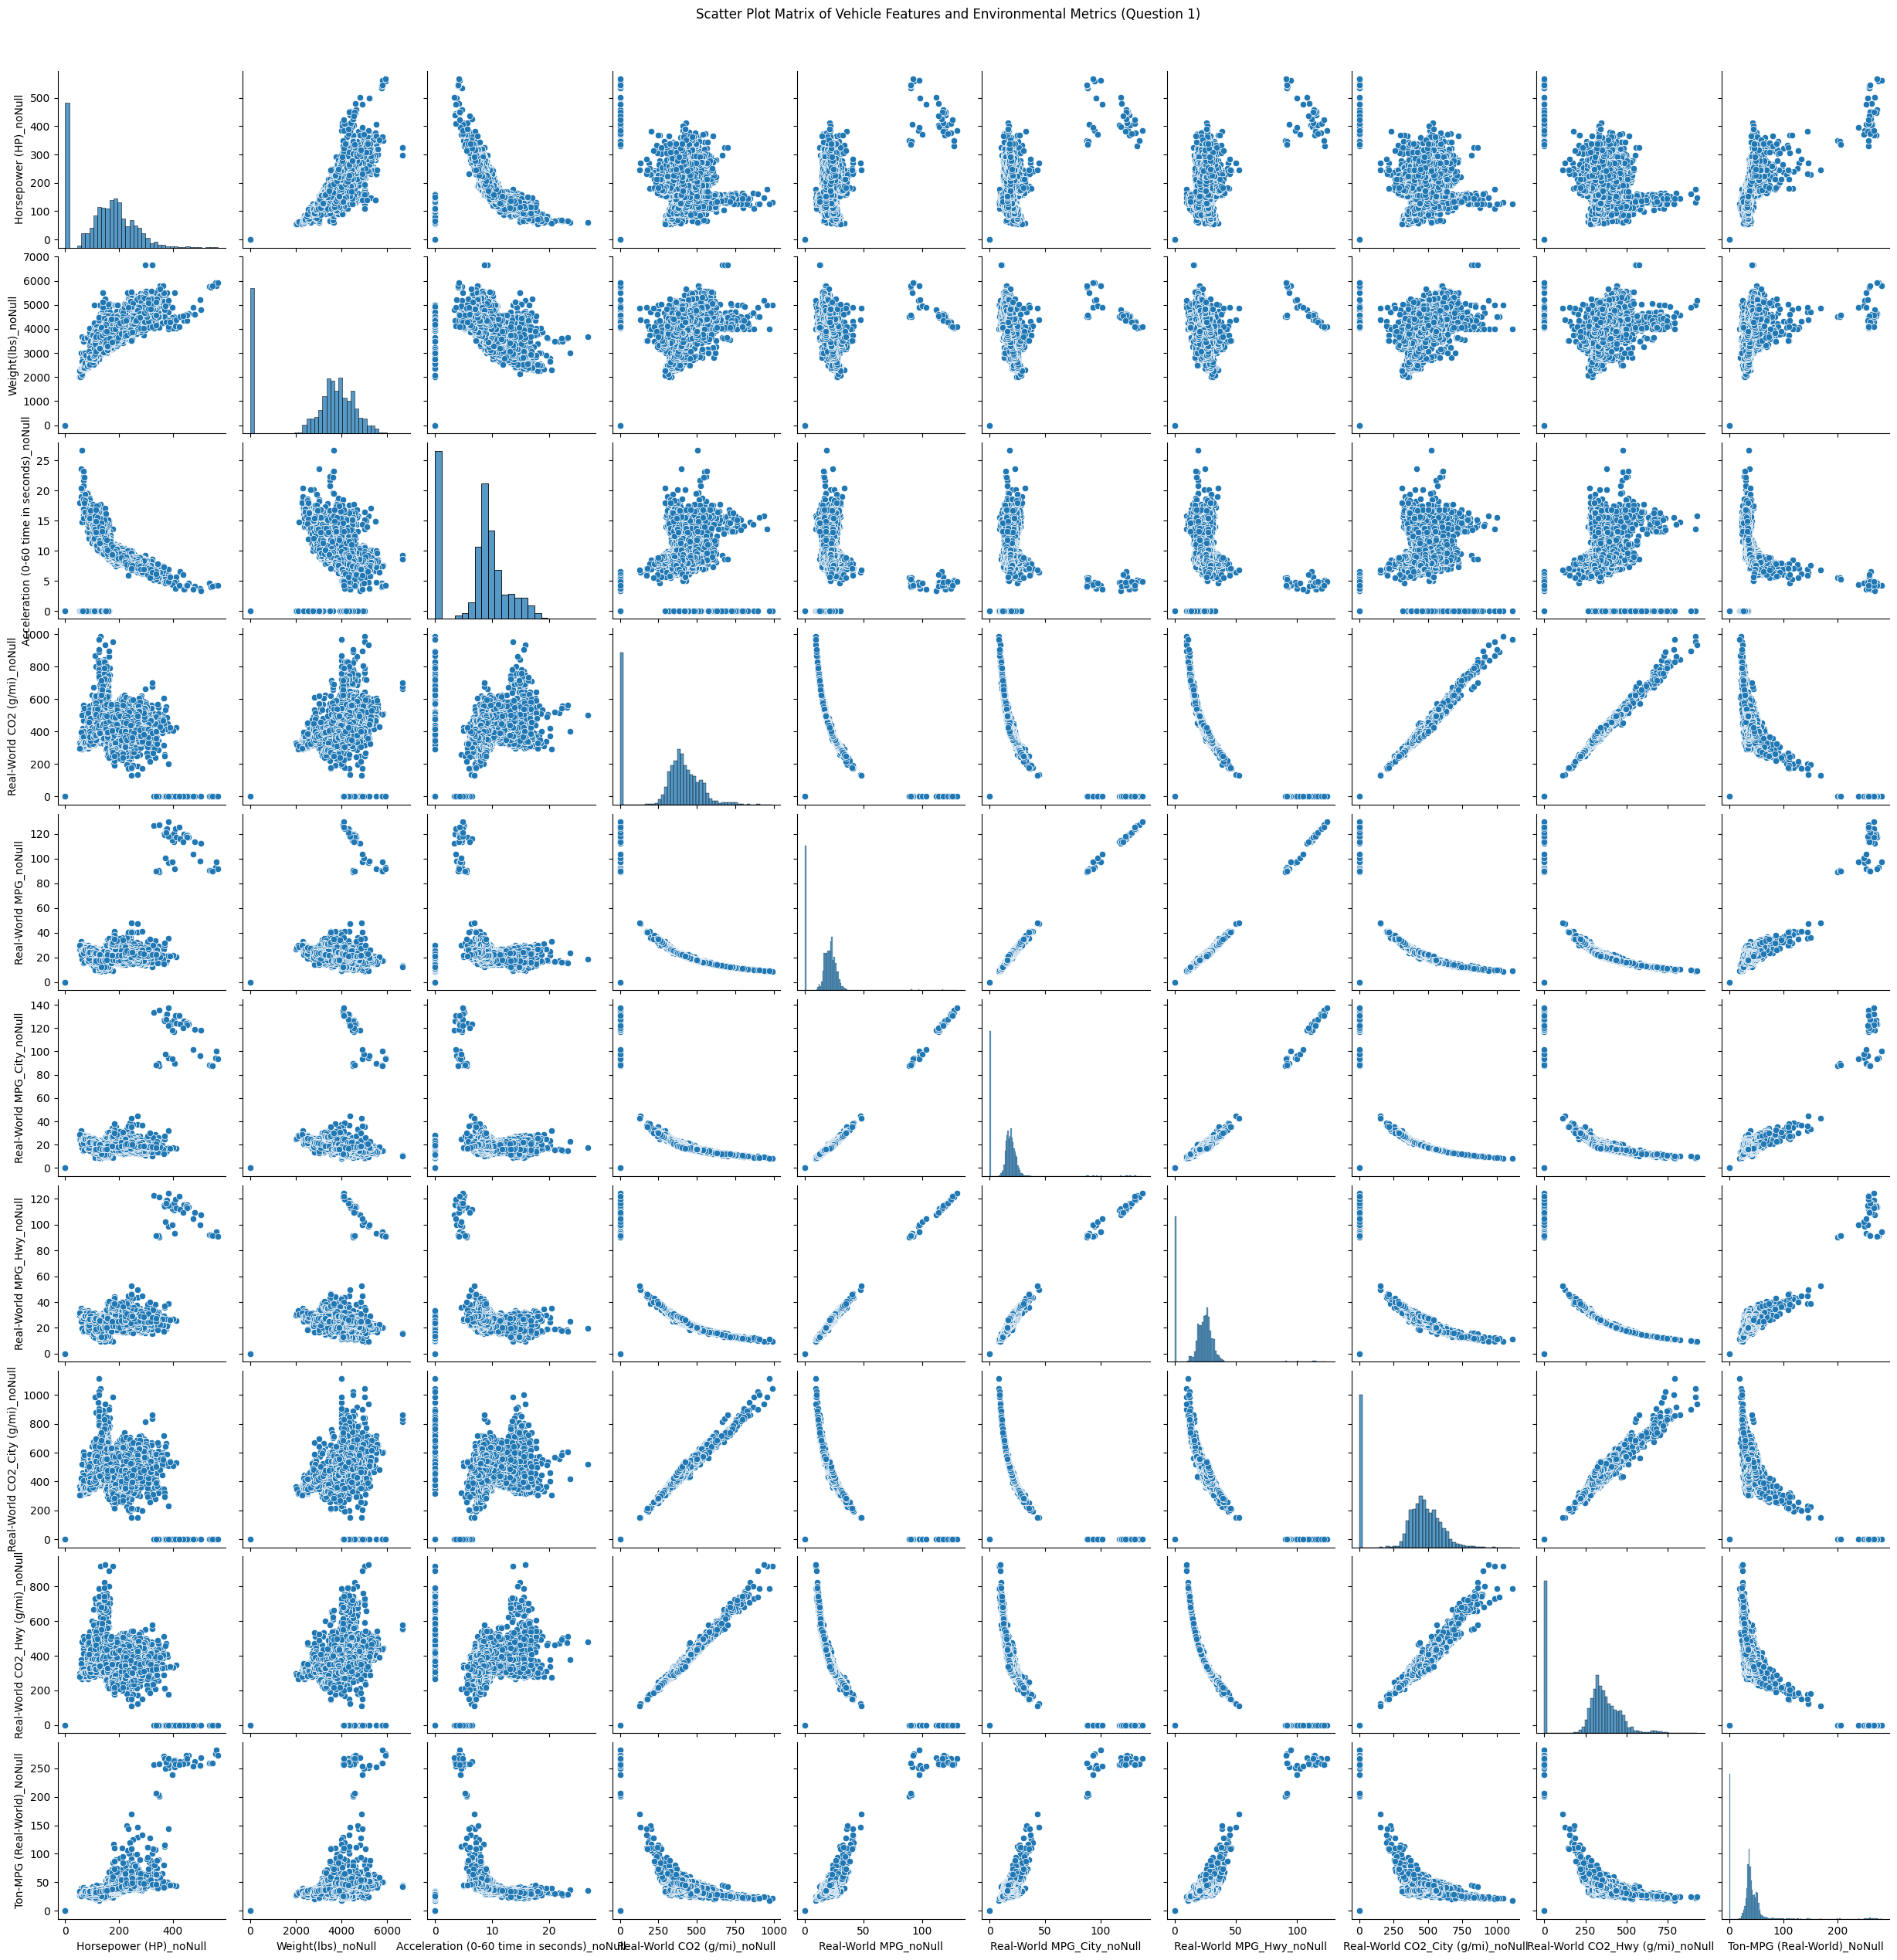

In [ ]:
# Generate a Scatter Plot Matrix (Chart #2 for Question 1)

# Select relevant columns for the scatter plot matrix (using the same non-scaled columns as Factor Analysis)
cols_for_scatter = ['Horsepower (HP)_noNull',
                    'Weight(lbs)_noNull',
                    'Acceleration (0-60 time in seconds)_noNull',
                    'Real-World CO2 (g/mi)_noNull',
                    'Real-World MPG_noNull',
                    'Real-World MPG_City_noNull',
                    'Real-World MPG_Hwy_noNull',
                    'Real-World CO2_City (g/mi)_noNull',
                    'Real-World CO2_Hwy (g/mi)_noNull',
                    'Ton-MPG (Real-World)_NoNull']

# Drop rows with NaN values for these columns
scatter_data = csv_gdrive[cols_for_scatter].dropna()

# Create the scatter plot matrix
sns.pairplot(scatter_data)
plt.suptitle('Scatter Plot Matrix of Vehicle Features and Environmental Metrics (Question 1)', y=1.02)
plt.show()


Generating Scatter Plot Matrix for variables with absolute correlation > 0.7:


Horsepower (HP)_noNull                      Real-World MPG_noNull                         0.700022
Real-World MPG_noNull                       Horsepower (HP)_noNull                        0.700022
Real-World CO2_City (g/mi)_noNull           Acceleration (0-60 time in seconds)_noNull    0.700152
Acceleration (0-60 time in seconds)_noNull  Real-World CO2_City (g/mi)_noNull             0.700152
                                            Real-World CO2 (g/mi)_noNull                  0.708292
Real-World CO2 (g/mi)_noNull                Acceleration (0-60 time in seconds)_noNull    0.708292
Acceleration (0-60 time in seconds)_noNull  Real-World CO2_Hwy (g/mi)_noNull              0.709569
Real-World CO2_Hwy (g/mi)_noNull            Acceleration (0-60 time in seconds)_noNull    0.709569
Horsepower (HP)_noNull                      Real-World MPG_Hwy_noNull                     0.730509
Real-World MPG_Hwy_noNull                   Horsepower (HP)_noNull                        0.730509
Ton-MPG (Real-World)_NoNull                 Horsepower (HP)_noNull                        0.768806
Horsepower (HP)_noNull                      Ton-MPG (Real-World)_NoNull                   0.768806
Real-World CO2_Hwy (g/mi)_noNull            Weight(lbs)_noNull                            0.859994
Weight(lbs)_noNull                          Real-World CO2_Hwy (g/mi)_noNull              0.859994
                                            Real-World CO2 (g/mi)_noNull                  0.870277
Real-World CO2 (g/mi)_noNull                Weight(lbs)_noNull                            0.870277
Weight(lbs)_noNull                          Real-World CO2_City (g/mi)_noNull             0.887192
Real-World CO2_City (g/mi)_noNull           Weight(lbs)_noNull                            0.887192
Horsepower (HP)_noNull                      Weight(lbs)_noNull                            0.904337
Weight(lbs)_noNull                          Horsepower (HP)_noNull                        0.904337
Real-World MPG_Hwy_noNull                   Ton-MPG (Real-World)_NoNull                   0.940153
Ton-MPG (Real-World)_NoNull                 Real-World MPG_Hwy_noNull                     0.940153
                                            Real-World MPG_noNull                         0.954987
Real-World MPG_noNull                       Ton-MPG (Real-World)_NoNull                   0.954987
Real-World MPG_City_noNull                  Ton-MPG (Real-World)_NoNull                   0.955615
Ton-MPG (Real-World)_NoNull                 Real-World MPG_City_noNull                    0.955615
Real-World MPG_Hwy_noNull                   Real-World MPG_City_noNull                    0.977604
Real-World MPG_City_noNull                  Real-World MPG_Hwy_noNull                     0.977604
Real-World CO2_Hwy (g/mi)_noNull            Real-World CO2_City (g/mi)_noNull             0.989889
Real-World CO2_City (g/mi)_noNull           Real-World CO2_Hwy (g/mi)_noNull              0.989889
Real-World MPG_City_noNull                  Real-World MPG_noNull                         0.993835
Real-World MPG_noNull                       Real-World MPG_City_noNull                    0.993835
                                            Real-World MPG_Hwy_noNull                     0.994731
Real-World MPG_Hwy_noNull                   Real-World MPG_noNull                         0.994731
Real-World CO2_City (g/mi)_noNull           Real-World CO2 (g/mi)_noNull                  0.996698
Real-World CO2 (g/mi)_noNull                Real-World CO2_City (g/mi)_noNull             0.996698
                                            Real-World CO2_Hwy (g/mi)_noNull              0.997855
Real-World CO2_Hwy (g/mi)_noNull            Real-World CO2 (g/mi)_noNull                  0.997855
dtype: float64

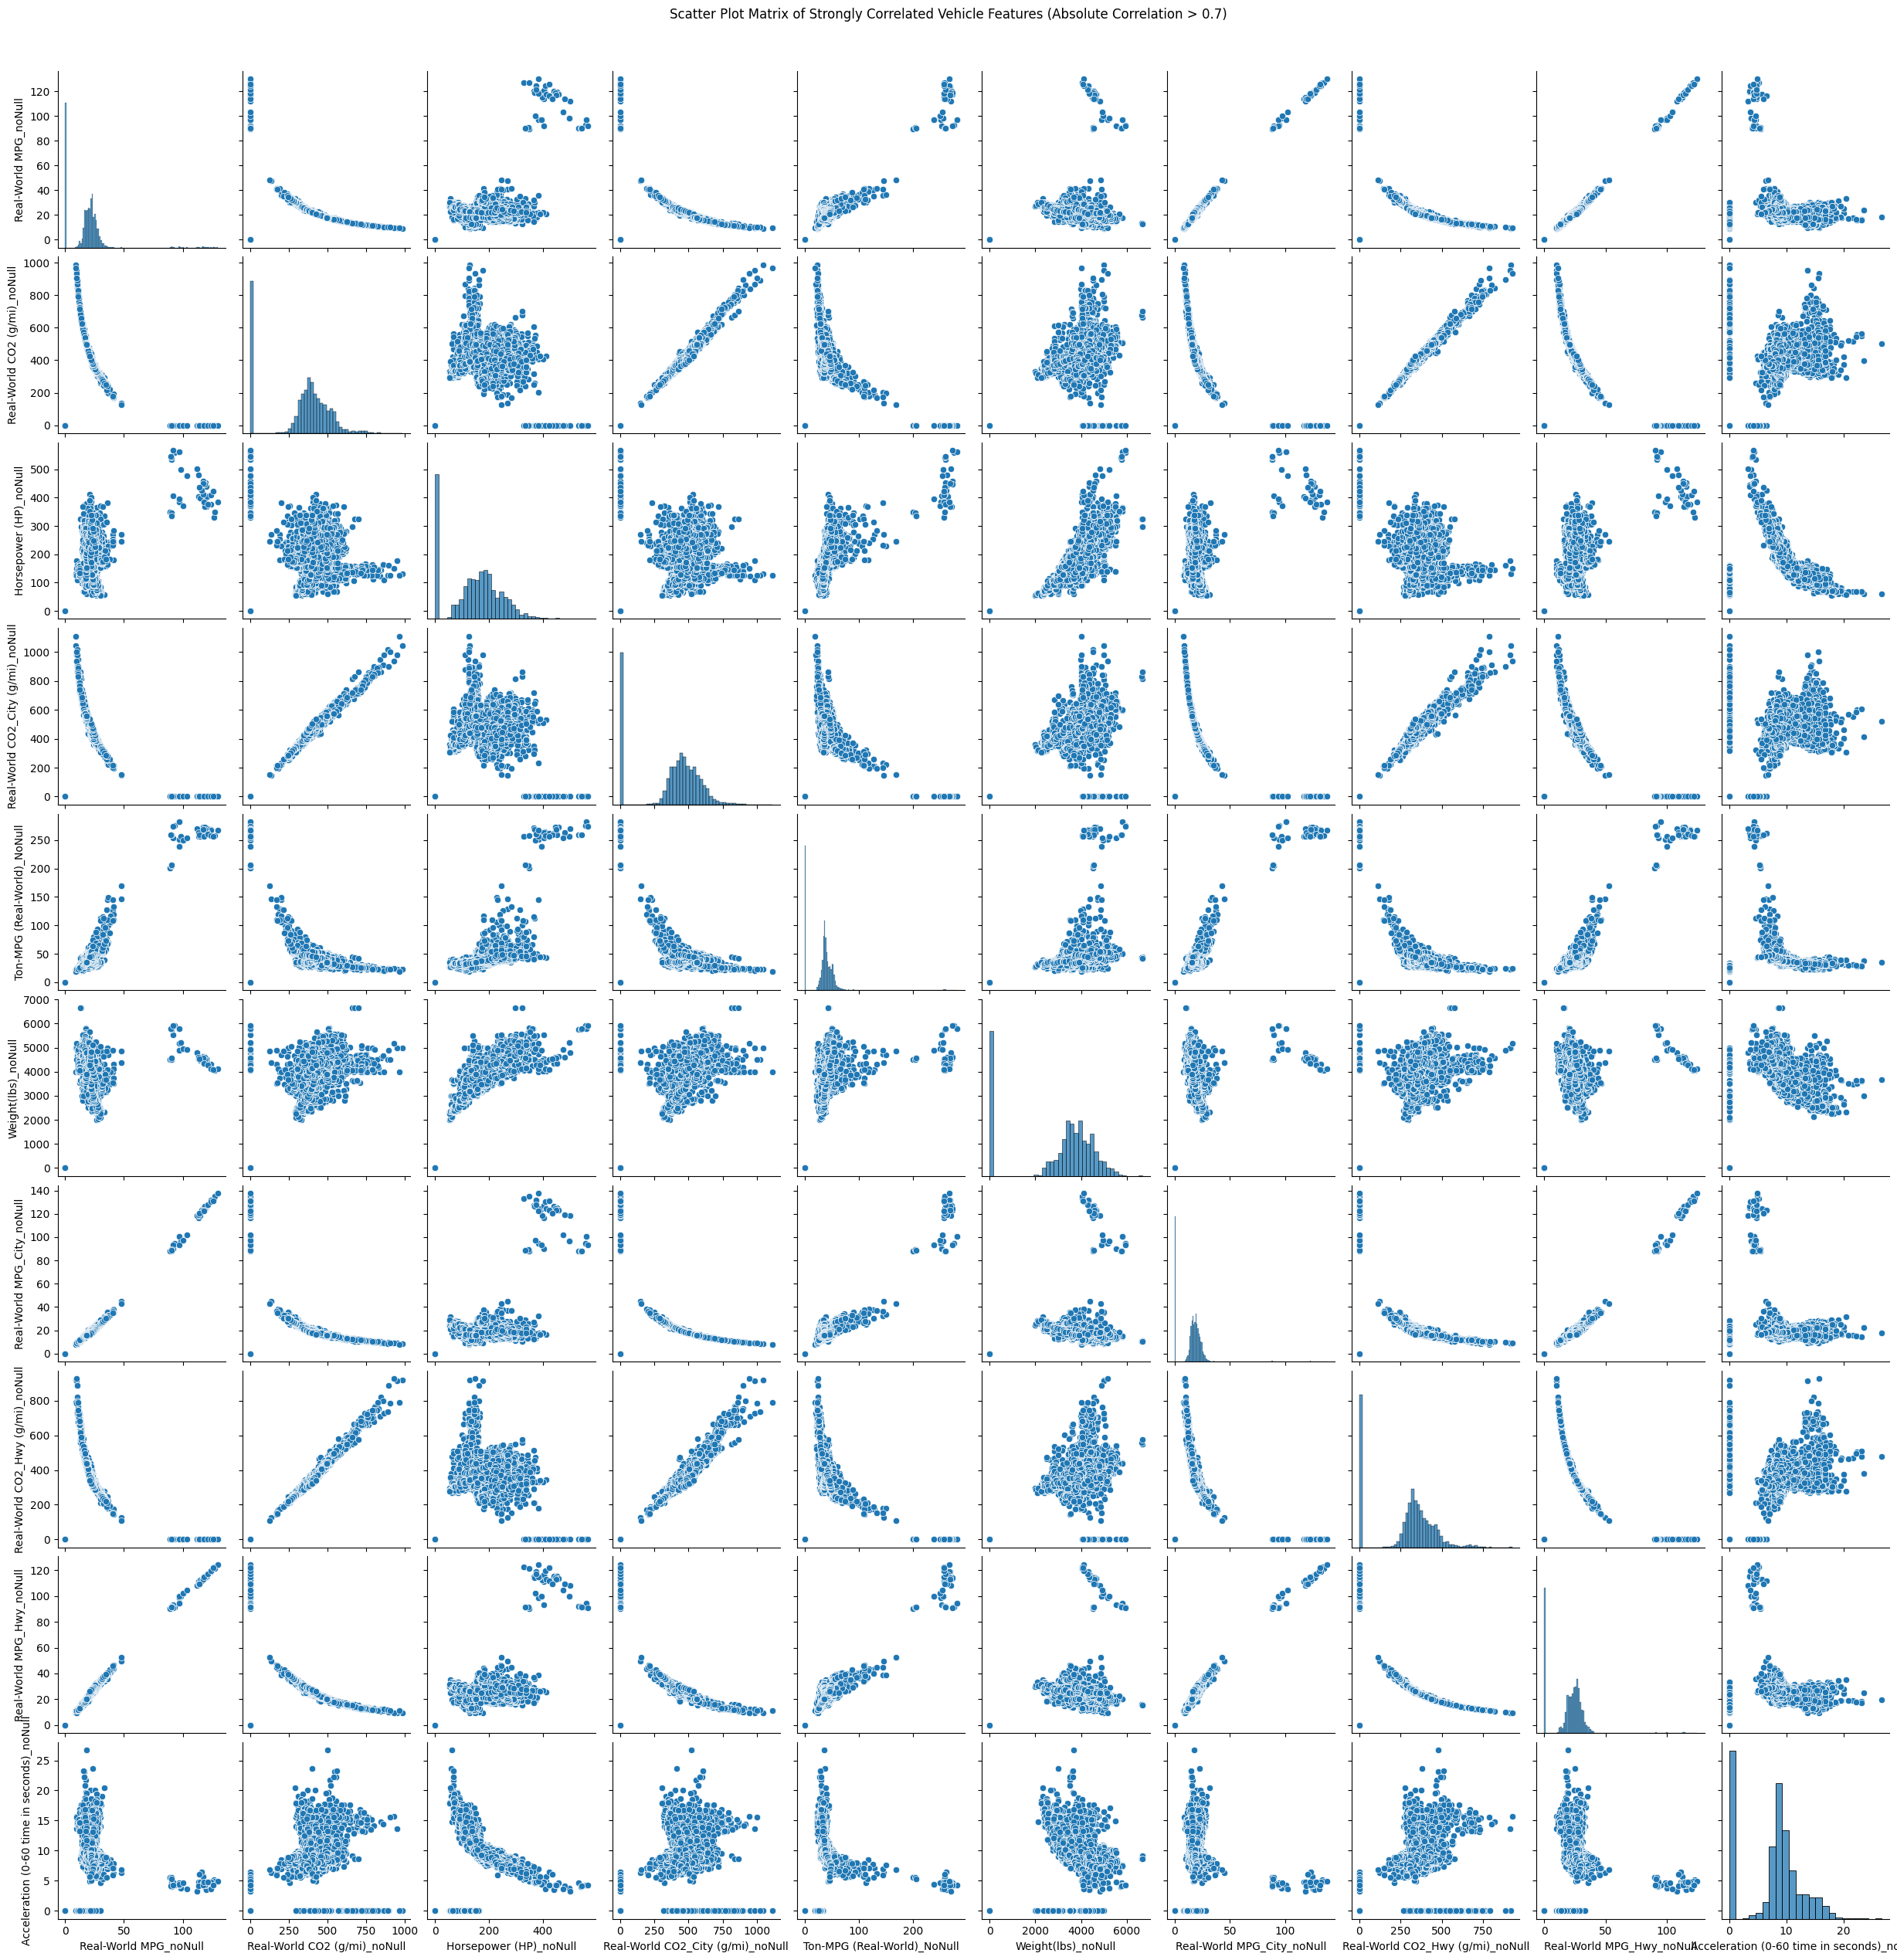

In [ ]:
# Create a Scatter Plot Matrix with only strongly correlated variables

# Select relevant columns for correlation analysis (using the same non-scaled columns as Factor Analysis)
cols_for_correlation = ['Horsepower (HP)_noNull',
                        'Weight(lbs)_noNull',
                        'Acceleration (0-60 time in seconds)_noNull',
                        'Real-World CO2 (g/mi)_noNull',
                        'Real-World MPG_noNull',
                        'Real-World MPG_City_noNull',fa
                        'Real-World MPG_Hwy_noNull',
                        'Real-World CO2_City (g/mi)_noNull',
                        'Real-World CO2_Hwy (g/mi)_noNull',
                        'Ton-MPG (Real-World)_NoNull']

# Drop rows with NaN values for these columns
correlation_data = csv_gdrive[cols_for_correlation].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Define a correlation threshold (e.g., absolute correlation > 0.7)
correlation_threshold = 0.7

# Find pairs of variables with strong correlations
# We use unstack() to get a Series of correlation pairs, then drop duplicates and self-correlations
strong_correlations = correlation_matrix.unstack().sort_values(kind="quicksort")
strong_correlations = strong_correlations[abs(strong_correlations) > correlation_threshold]
strong_correlations = strong_correlations[strong_correlations != 1.0] # Remove self-correlations

# Get the list of variables involved in strong correlations
variables_with_strong_corr = list(set([x[0] for x in strong_correlations.index] + [x[1] for x in strong_correlations.index]))

# Create a Scatter Plot Matrix for only these strongly correlated variables
if variables_with_strong_corr:
    print(f"\nGenerating Scatter Plot Matrix for variables with absolute correlation > {correlation_threshold}:")
    display(strong_correlations)
    sns.pairplot(correlation_data[variables_with_strong_corr])
    plt.suptitle(f'Scatter Plot Matrix of Strongly Correlated Vehicle Features (Absolute Correlation > {correlation_threshold})', y=1.02)
    plt.show()
else:
    print(f"\nNo variable pairs found with absolute correlation > {correlation_threshold}.")

##For MVDA Q2

###Chart # 3 Visualization - Preliminaries + Principal Component Analysis (PCA) - 4 principal components explain virtually all (nearly 100%) of the data's total variance.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select relevant columns for PCA (Question 2), using non-scaled versions as requested where applicable
pca_data = csv_gdrive[['Horsepower (HP)_noNull',
                      'Weight(lbs)_noNull',
                      'Acceleration (0-60 time in seconds)_noNull',
                      'Real-World CO2 (g/mi)_noNull_scaled',
                      'Real-World MPG_noNull',
                      'Real-World MPG_City_noNull',
                      'Real-World MPG_Hwy_noNull',
                      'Real-World CO2_City (g/mi)_noNull',
                      'Real-World CO2_Hwy (g/mi)_noNull',
                      'Ton-MPG (Real-World)_NoNull']]

# Drop rows with NaN values for these columns
pca_data = pca_data.dropna()

# Perform Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(pca_data)
print(f"Bartlett's Test of Sphericity:")
print(f"Chi-square value: {chi_square_value}")
print(f"P-value: {p_value}")
# A significant p-value (typically < 0.05) indicates that the variables are correlated and suitable for PCA/Factor Analysis.
# A large chi-square value is expected with correlated variables.

Bartlett's Test of Sphericity:
Chi-square value: 206049.38542305437
P-value: 0.0


In [ ]:
# Perform Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(pca_data)
print(f"\nKaiser-Meyer-Olkin (KMO) Test:")
print(f"KMO value: {kmo_model}")
# A KMO value > 0.6 is generally considered good for PCA/Factor Analysis.

# Proceed with PCA if tests indicate suitability (p-value < 0.05 and KMO > 0.6)
if p_value is not None and not pd.isna(p_value) and p_value < 0.05 and kmo_model > 0.6:
    print("\nData is suitable for PCA. Performing PCA...")
    # Standardize the data before applying PCA
    scaler = StandardScaler()
    pca_scaled_data = scaler.fit_transform(pca_data)

    # Initialize and fit PCA
    pca = PCA()
    pca.fit(pca_scaled_data)

    # Get explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio by Principal Components:")
    display(explained_variance_ratio)



Kaiser-Meyer-Olkin (KMO) Test:
KMO value: 0.6087780162184453

Data is suitable for PCA. Performing PCA...

Explained Variance Ratio by Principal Components:


array([6.72549894e-01, 2.42532662e-01, 5.87924195e-02, 1.95764219e-02,
       4.19397045e-03, 1.31098304e-03, 6.89988066e-04, 3.39069278e-04,
       1.29325635e-05, 1.65925453e-06])

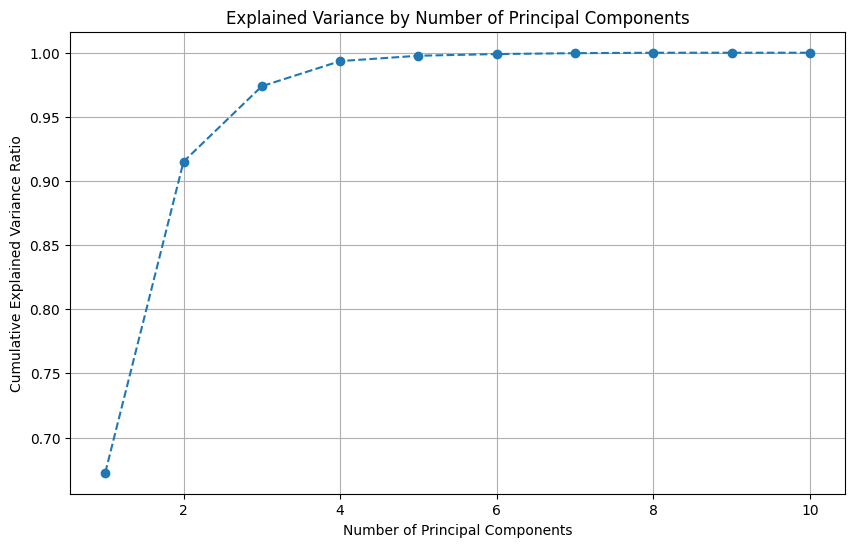

In [ ]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

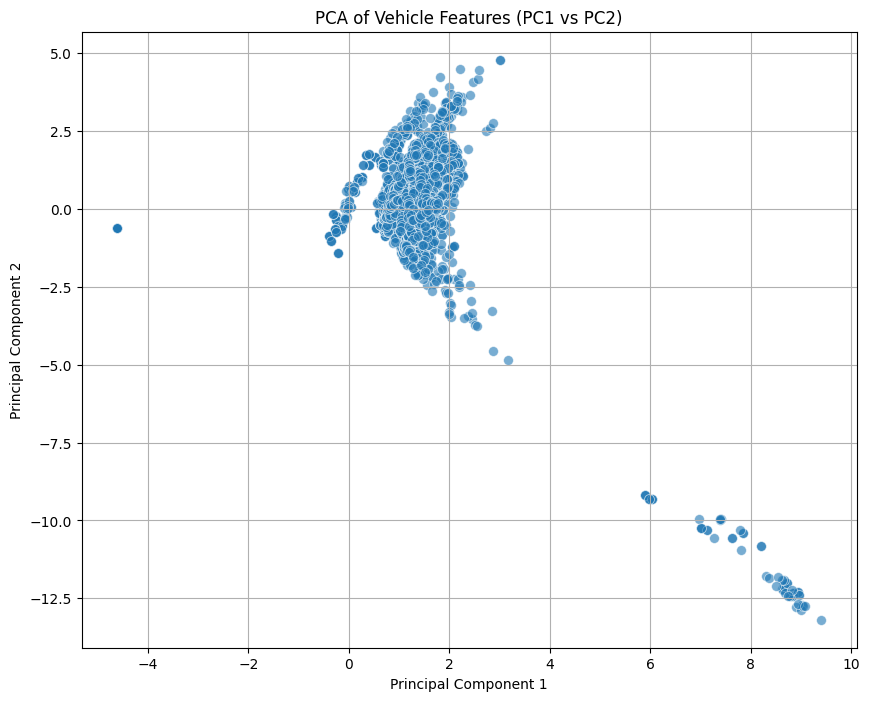


Data may not be suitable for PCA based on preliminary tests.


In [ ]:
# You can decide on the number of components to keep based on the plot (e.g., elbow point or cumulative variance > 80%)
# Let's say we decide to keep 2 components for visualization based on the plan
n_components_to_keep = 2 # This can be adjusted

pca = PCA(n_components=n_components_to_keep)
pca_result = pca.fit_transform(pca_scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components_to_keep)])

# Add back some original columns for context if needed (e.g., Manufacturer, Model Year, Regulatory Class, Vehicle Type)
# Make sure indices align after dropping NaNs
original_data_subset = csv_gdrive.loc[pca_data.index, ['Manufacturer', 'Model Year (Renew)', 'Regulatory Class', 'Vehicle Type']].reset_index(drop=True)
pca_df = pd.concat([pca_df, original_data_subset], axis=1)


# Visualize PCA results using a scatter plot of the first two components
if n_components_to_keep >= 2:
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.6)
  plt.title('PCA of Vehicle Features (PC1 vs PC2)')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.grid(True)
  plt.show()

# Parallel Coordinates Plot (requires more than 2 components to show relationships across multiple dimensions)
# If you keep more than 2 components, you can visualize them using parallel coordinates
if n_components_to_keep > 2:
  plt.figure(figsize=(12, 6))
  pd.plotting.parallel_coordinates(pca_df, 'Regulatory Class', cols=[f'PC{i+1}' for i in range(n_components_to_keep)], color=sns.color_palette('viridis', n_components_to_keep))
  plt.title('Parallel Coordinates Plot of Principal Components')
  plt.ylabel('Component Value')
  plt.grid(True)
  plt.show()

else:
    print("\nData may not be suitable for PCA based on preliminary tests.")
    if p_value is None or pd.isna(p_value) or p_value >= 0.05:
        print("Bartlett's Test of Sphericity did not pass (p-value is not < 0.05).")
    if kmo_model <= 0.6:
        print("Kaiser-Meyer-Olkin (KMO) Test did not pass (KMO value is not > 0.6).")

###Chart # 4 Visualization - Parallel Coordinates Plot - Regular Classes Traversing Through Principal Components



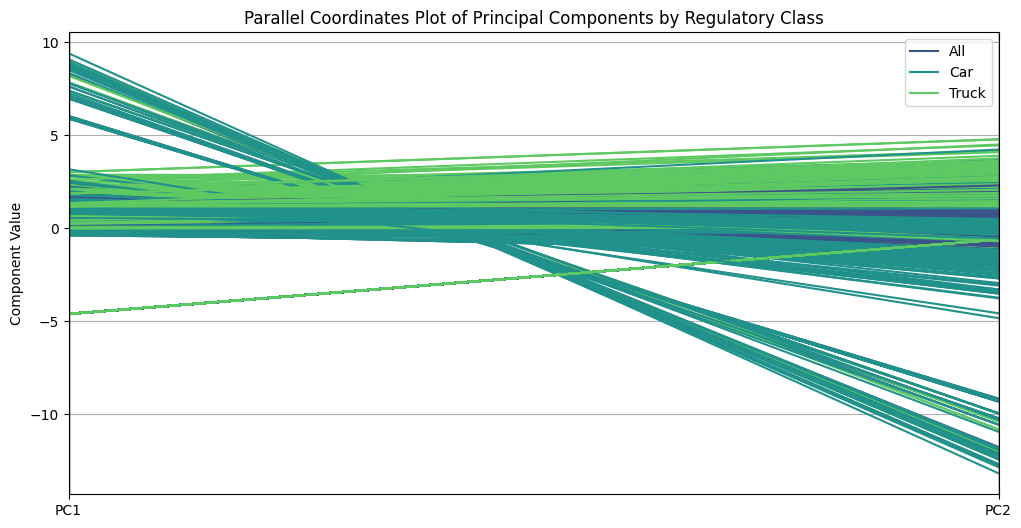

In [ ]:
# Parallel Coordinates Plot for Question 2

# Ensure pca_df is available from previous steps and has more than one component
if 'pca_df' in locals() and pca_df.shape[1] > 1:
  plt.figure(figsize=(12, 6))
  # Using 'Regulatory Class' for coloring, assuming it was added to pca_df
  if 'Regulatory Class' in pca_df.columns:
    pd.plotting.parallel_coordinates(pca_df, 'Regulatory Class', cols=[f'PC{i+1}' for i in range(pca_df.shape[1]-4)], color=sns.color_palette('viridis', pca_df['Regulatory Class'].nunique())) # Adjust cols to exclude non-PC columns and color by unique values
    plt.title('Parallel Coordinates Plot of Principal Components by Regulatory Class')
    plt.ylabel('Component Value')
    plt.grid(True)
    plt.show()
  else:
    print(" 'Regulatory Class' column not found in pca_df. Cannot color by Regulatory Class.")
    # If 'Regulatory Class' is not available, plot without coloring
    plt.figure(figsize=(12, 6))
    pd.plotting.parallel_coordinates(pca_df, 'PC1', cols=[f'PC{i+1}' for i in range(pca_df.shape[1]-4)]) # Adjust cols to exclude non-PC columns
    plt.title('Parallel Coordinates Plot of Principal Components')
    plt.ylabel('Component Value')
    plt.grid(True)
    plt.show()
else:
  print("PCA results (pca_df) not available or only one component was kept. Cannot generate Parallel Coordinates Plot.")

### Chart # 4.5 -  Parallel Coordinates Plot - Regular Classes Traversing Through Original Relevant Vehicle Features

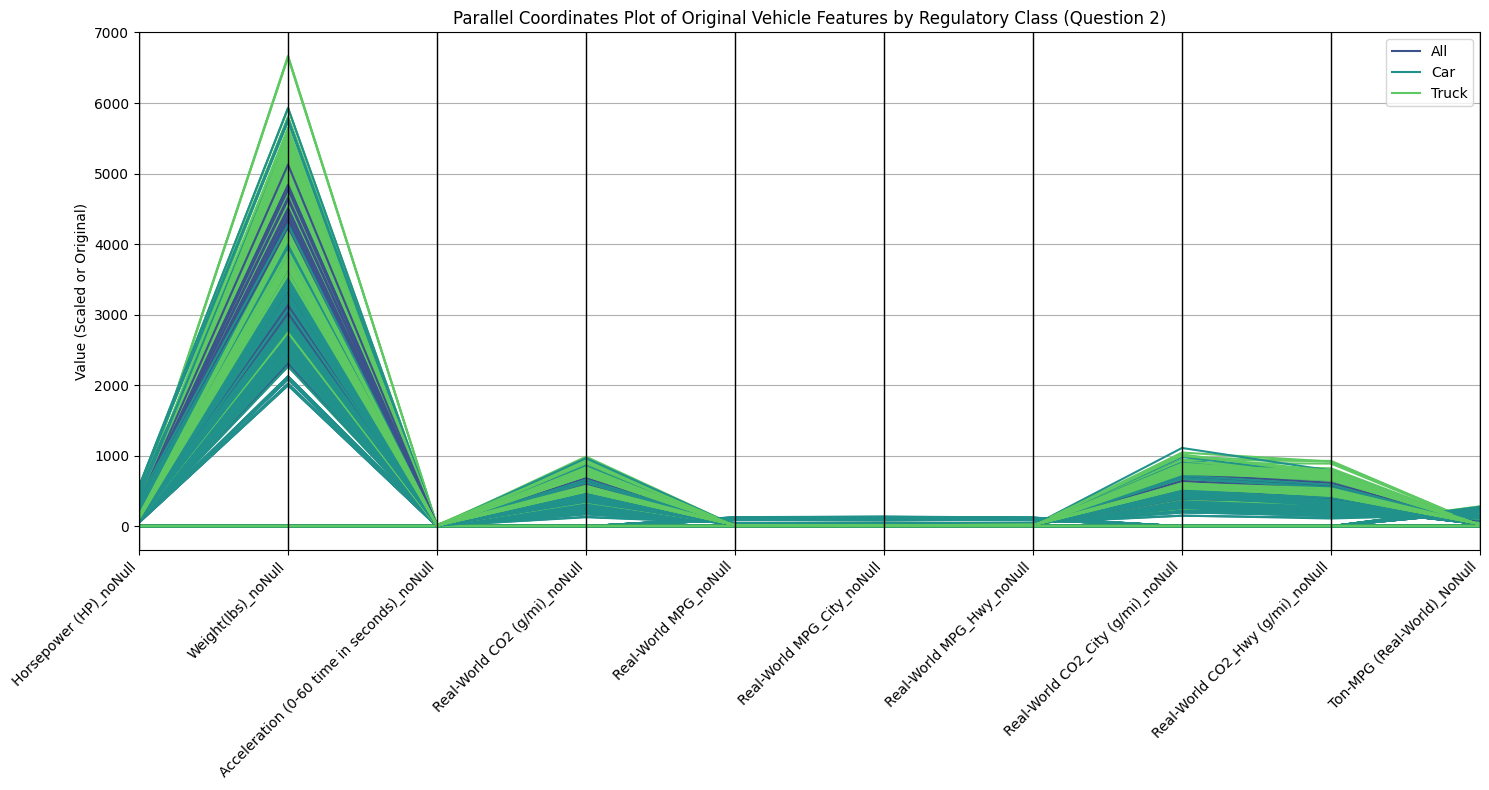

In [ ]:
# Parallel Coordinates Plot using original relevant columns for Question 2

# Select the original relevant columns for Question 2 (non-scaled where applicable)
cols_q2_original = ['Horsepower (HP)_noNull',
                    'Weight(lbs)_noNull',
                    'Acceleration (0-60 time in seconds)_noNull',
                    'Real-World CO2 (g/mi)_noNull', # Changed to non-scaled
                    'Real-World MPG_noNull',
                    'Real-World MPG_City_noNull',
                    'Real-World MPG_Hwy_noNull',
                    'Real-World CO2_City (g/mi)_noNull',
                    'Real-World CO2_Hwy (g/mi)_noNull',
                    'Ton-MPG (Real-World)_NoNull']

# Create a DataFrame with these columns and drop NaNs
parallel_data_original = csv_gdrive[cols_q2_original].dropna()

# Add 'Regulatory Class' for coloring, aligning indices
parallel_data_original = parallel_data_original.copy() # Create a copy to avoid SettingWithCopyWarning
parallel_data_original['Regulatory Class'] = csv_gdrive.loc[parallel_data_original.index, 'Regulatory Class']


# Generate the Parallel Coordinates Plot
plt.figure(figsize=(15, 8))
# Drop rows where 'Regulatory Class' is NaN before plotting
parallel_data_original.dropna(subset=['Regulatory Class'], inplace=True)
pd.plotting.parallel_coordinates(parallel_data_original, 'Regulatory Class', cols=cols_q2_original, color=sns.color_palette('viridis', parallel_data_original['Regulatory Class'].nunique()))

plt.title('Parallel Coordinates Plot of Original Vehicle Features by Regulatory Class (Question 2)')
plt.ylabel('Value (Scaled or Original)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid(True)
plt.show()

##For MVDA Q3

###Chart # 5 Visualization - Discriminant Analysis (DA) & Chart # 6 - Color-Based Visualizations - Regulatory Class Separated by Vehicle Performance


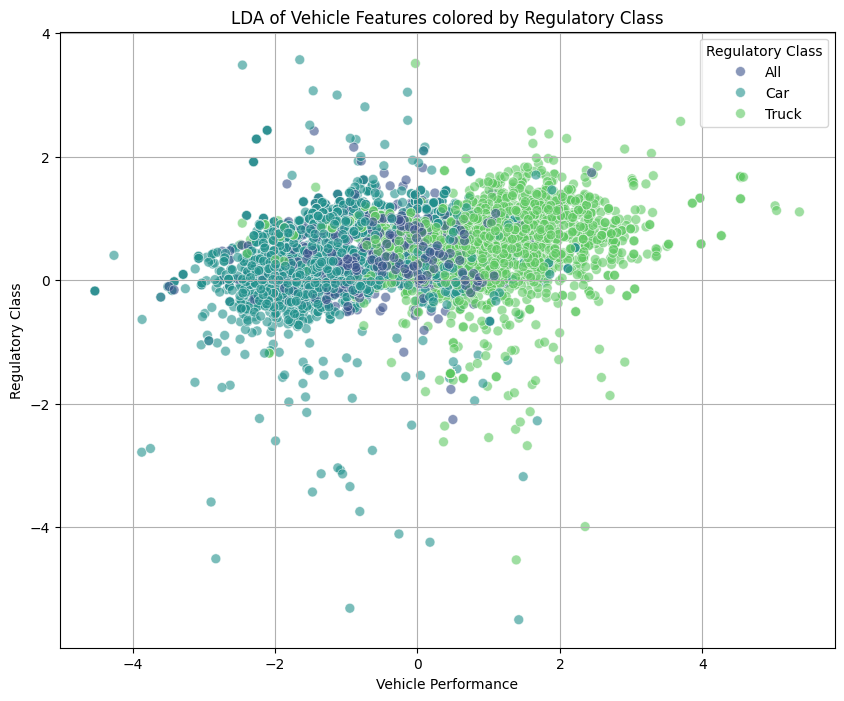


Explained Variance Ratio by Linear Discriminant Components:


array([0.98185535, 0.01814465])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for Discriminant Analysis (Question 3)
# Exclude categorical columns for the LDA model fitting and use non-scaled CO2
cols_for_lda = ['Horsepower (HP)_noNull',
                'Weight(lbs)_noNull',
                'Acceleration (0-60 time in seconds)_noNull',
                'Real-World CO2 (g/mi)_noNull', # Changed to non-scaled
                'Real-World MPG_noNull',
                'Real-World MPG_City_noNull',
                'Real-World MPG_Hwy_noNull',
                'Real-World CO2_City (g/mi)_noNull',
                'Real-World CO2_Hwy (g/mi)_noNull',
                'Ton-MPG (Real-World)_NoNull']

# Define features (X) and target (y)
X = csv_gdrive[cols_for_lda].dropna()
y = csv_gdrive.loc[X.index, 'Regulatory Class'] # Using 'Regulatory Class' as the target

# Drop rows with NaN values in the target variable as well
valid_indices = y.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]


# Handle potential infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index] # Ensure y aligns with cleaned X

# Split data (optional but good practice for classification)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Linear Discriminant Analysis
# n_components can be set to min(n_classes - 1, n_features)
lda = LinearDiscriminantAnalysis(n_components=min(len(y.unique()) - 1, X_scaled.shape[1]))
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame with the LDA components and the target variable
lda_df = pd.DataFrame(data=X_lda, columns=[f'LD{i+1}' for i in range(X_lda.shape[1])])
lda_df['Regulatory Class'] = y.values

# Visualize the results using a scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='LD1', y='LD2', hue='Regulatory Class', data=lda_df, palette='viridis', s=50, alpha=0.6)
plt.title('LDA of Vehicle Features colored by Regulatory Class')
plt.xlabel('Vehicle Performance')
plt.ylabel('Regulatory Class')
plt.legend(title='Regulatory Class')
plt.grid(True)
plt.show()

# You can also check the explained variance ratio of the components
print("\nExplained Variance Ratio by Linear Discriminant Components:")
display(lda.explained_variance_ratio_)

# You can also use 'Vehicle Type' as the target variable by changing the line:
# y = csv_gdrive.loc[X.index, 'Vehicle Type']
# Remember to handle potential NaN values and re-run the LDA and visualization.

In [ ]:
# You can also check the explained variance ratio of the components
print("\nExplained Variance Ratio by Linear Discriminant Components:")
display(lda.explained_variance_ratio_)

# You can also use 'Vehicle Type' as the target variable by changing the line:
# y = csv_gdrive.loc[X.index, 'Vehicle Type']
# Remember to handle potential NaN values and re-run the LDA and visualization.


Explained Variance Ratio by Linear Discriminant Components:


array([0.98185535, 0.01814465])

###Chart # 6.5 -  Linear Discriminant Analysis (LDA) - Regulatory Class Separated by Vehicle Performance with Approximated Decision Boundaries

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


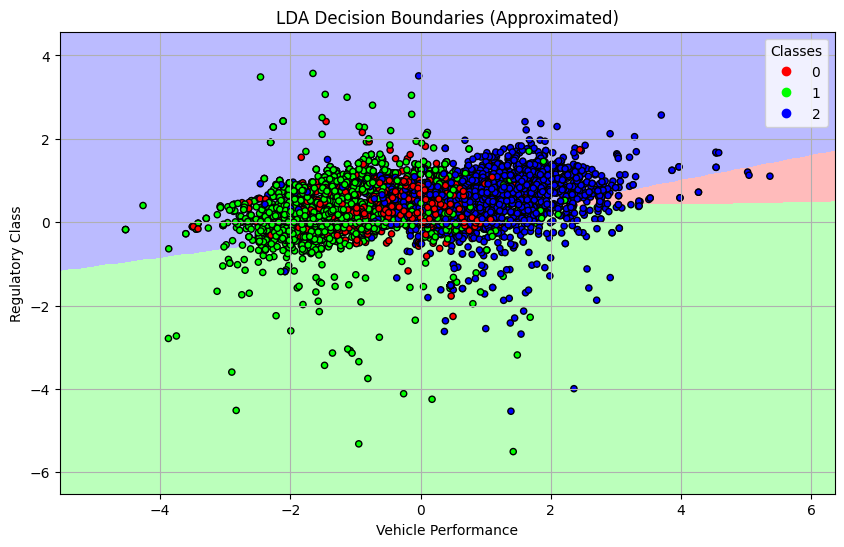

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the mesh grid in the LDA space
x_min, x_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
y_min, y_max = X_lda[:, 1].min() - 1, X_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Attempt to predict on a 2D mesh grid by adding mean values for other features
# This is an approximation for visualization purposes
X_mean_scaled = X_scaled.mean(axis=0)
# Create a 10D mesh grid where the first 2 dimensions are from xx, yy and the rest are means
X_mesh_approx = np.c_[xx.ravel(), yy.ravel(), np.tile(X_mean_scaled[2:], (xx.size, 1))]

# Predict class for each point in the mesh
Z = lda.predict(X_mesh_approx)

# Convert predicted class labels to numerical values
# Use the order of classes from the LDA model
class_mapping = {class_name: i for i, class_name in enumerate(lda.classes_)}
Z_numeric = np.array([class_mapping[label] for label in Z.ravel()])

# Convert original target variable to numerical values for plotting
y_numeric = np.array([class_mapping[label] for label in y])


# Reshape the numerical prediction results to match the mesh grid shape
Z_numeric = Z_numeric.reshape(xx.shape)

# Create a colormap for the decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
plt.figure(figsize=(10, 6))
# Use pcolormesh for discrete regions with numerical data
plt.pcolormesh(xx, yy, Z_numeric, cmap=cmap_light, alpha=0.8)


# Plot the training points
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_numeric, cmap=cmap_bold, edgecolor='k', s=20) # Use y_numeric here

# Add labels and title
plt.xlabel('Vehicle Performance')
plt.ylabel('Regulatory Class')
plt.title('LDA Decision Boundaries (Approximated)')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()

##Part 4: Analyze Each Result & Visualization

- For each analysis and chart, answer the following:

- Main takeaway in one sentence (e.g., "The first two principal components explain over 80% of the variance in the dataset.")

- One design or analysis decision and its benefit (e.g., "Used a Scree Plot to determine that retaining two principal components was sufficient for our analysis.")

##For MVDA Q1

###Chart # 1 Analysis - preliminaries + Factor Analysis

Preliminaries because we are using Factor Analysis :  

Decision parameter for p-value :
If p < 0.05,  variables are correlated enough to justify the use of Factor analysis. Can also mean the correlation matrix was significantly different from the identity matrix.

∴ Since p-value is 0 < 0.05, or zero is less than 0.05, the variables are correlated enough to justify the use of Factor analysis.

Decision parameter for KMO value :
If KMO value > 0.6 is generally considered good for Factor analysis.

∴ Since the KMO value 0.61 > 0.6,  or KMO value is greater than 0.6, the data is considered suitable for Factor analysis.

Conclusion on preliminary for Factor analysis:
Both p-value and KMO values on the preliminary tests satisfy the conditions to justify the use of Factor analysis.

Analysis :  
Figure 1.2 depicts the use of Bartlett’s Test of Sphericity and the Kaiser-Meyer-Olkin (KMO) Test as preliminary checks for Factor analysis. Follows suit is the Factor Analysis itself and the heatmap visualization of the factor holdings. The Barlett’s Test checks if the variables are uncorrelated, while the KMO Test measures the sampling adequacy. By using Factory Analysis we could identify the underlying factors that explain the correlation between variables, while the heatmap shows how each variable loads onto each factor strongly.

P, Weight, Acceleration) and environmental metrics (Real-World CO2, Real-World MPG, etc.) group together into underlying factors.

One design or analysis decision and its benefit
We noticed that the use of Barlett’s Test and the KMO test before Factor Analysis provides statistical evidence for the suitability of the data for this particular technique while ensuring that the identified factors are well-defined and meaningful.

Additional Insights :

The interpretation of meaning of each factor by showing which variables load highly on which factor can be depicted well using a factor loadings heatmap. An example would be a factor with high loadings on MPG variables and low loadings on CO2 variables that might represent ‘Fuel Efficiency’, while a factor with high loadings on ‘Horsepower’ and ‘Weight’ might represent ‘Vehicle Power/Size’. The variance explained by each factor indicates the proportion of the total variance in the original variables accounted for by each factor that helps in deciding how many factors to retain.

The interpretation of factors based on loadings can be subjective and different rotation methods might lead to different factor structures.



###Chart # 2 Analysis - Scatter Plot - Finding correlations on Vehicle Features and Environmental variables


Analysis :  
In Figure 2.0, we can see that it involves a scatter plot matrix that displays the pairwise relationships between the selected vehicle features and environmental metrics for the first question. The figure depicts not only scatter plots for every combination of two variables but also histograms for each individual variable along the diagonal.

Main takeaway in one sentence
The scatter plot matrix above highlights the visual overview of the pairwise relationships and distributions of the relevant vehicle features and environmental metrics while highlighting the potential correlations.

One design or analysis decision and its benefit
Generating the Scatter Plot Matrix as a preliminary step allows us to quickly identify visually the potential linear or non-linear relationships between variables before applying more complex multivariate techniques like Factor Analysis.


Additional Insights :
We could only show the relationship between two variables on 1 graph , so from all of these graphs present in the matrix from both pairwise scatter plot and univariate histogram, we have a limitation that we could not see and observe the interaction occurring if we want three or more variables interact at the same time.

Visual-wise from the size of the scatter plot and number of variables is considered to be cluttered thus there are difficulties in briefly interpreting the scatter plot matrix results.


##For MVDA Q2

###Chart # 3 Analysis - Preliminaries + Principal Component Analysis (PCA)

Preliminaries since we are using Principal Component Analysis (PCA) : Decision parameter for p-value :
If p < 0.05,  variables are correlated enough to justify the use of PCA. Can also mean the correlation matrix was significantly different from the identity matrix.

∴ Since p-value is 0 < 0.05, or zero is less than 0.05, the variables are correlated enough to justify the use of PCA.

Decision parameter for KMO value :
If KMO value > 0.6 is generally considered good for Principal Component Analysis (PCA).

∴ Since the KMO value 0.61 > 0.6,  or KMO value is greater than 0.6, the data is considered suitable for Principal Component Analysis (PCA).

Conclusion on preliminary for PCA :
Both p-value and KMO values on the preliminary tests satisfy the conditions to justify the use of Principal Component Analysis (PCA).

Analysis :  
The figures above depict Principal Component Analysis (PCA) on the selected vehicle features to reduce their dimensionality. We can see in the first chart the cumulative explained variance by the number of principal components that help determine the number of components needed to capture a sufficient amount of the total variance. As for the second chart, it involves a scatter plot of the first two principal components, which includes PC1 and PC2, that visualizes the data in a reduced 2D space.

Main takeaway in one sentence
The first few principal components take into account a significant part of the variance in the features of vehicles, allowing for dimensionality reduction while keeping the important information.


One design or analysis decision and its benefit
We discovered that using the cumulative explained variance plot helped us in deciding on a reasonable number of principal components to retain, which then reduces the complexity of the dataset all the while preserving most of the variability at the same time.

Additional Insights :
The scatter plots on the figures prior (PC1 vs PC2) provides a visual representation of how vehicles are distributed in the reduced dimensional space. By observing the clusters or patterns in the plots can give us insights into the relationships between vehicles based on the combined influence of the original features. The original variables’ loadings on the principal components, that of which can be obtained from the PCA object, would provide further insight into what each component represents in terms of the original features.


###Chart # 4 Analysis - Parallel Coordinates Plot & Chart # 4.5 Analysis (V2) - Parallel Coordinates Plot

Analysis :  
In Figure 4,1, we can see a Parallel Coordinates Plot that visualizes the principal components for different vehicles that are colored by ‘Regulatory Class.’ Each line that we see represents a vehicle, while the line traverses the vertical axes that represent the principal components, such as PC1, PC2, and potentially more if kept. Such plot helps to observe patterns and relationships across multiple dimensions simultaneously in the reduced PCA space.
Main takeaway in one sentence
The Parallel Coordinates Plot allows for a visual inspection of how different vehicle regulatory classes are distributed across the principal components all the while providing insights into their multivariate characteristics.

One design or analysis decision and its benefit
We found out that coloring the lines by ‘Regulatory Class’ helps to visually differentiate between the groups and observe if there are any distinct patterns or clusters for the variables ‘All’, ‘Car’, and ‘Truck’ vehicles in the reduced dimensional space

Additional Insights :
The visual distortion caused by the extreme difference in variable scales, leading to significant overplotting and a loss of detail. The axes at Figure 4.1 are somewhat visually distinct are X-axis Weight(lbs), Real World CO2(g/mi),  Real World CO2_City, and  Real World CO2_Hwy while the rest suffers the aforementioned overplotting. It becomes nearly impossible to discern variation, patterns, or clusters within these critical efficiency metrics, severely limiting the plot's ability to compare efficiency nuancedly across the regulatory classes. The same goes for Figure 4.0 because there are many lines representing many observations.


##For MVDA Q3

###Chart # 5 & 6  Analysis - Discriminant Analysis & Color-Based Visualizations

Analysis :
In Figure 5.1 and 5.2, we can see that it involves a linear discriminant analysis chart that displays a separation between variables in terms of regulatory class. The figure 5.2 shows a more clearer presentation of how the variables are separated by coloring the boundaries and the area they fill which shows “Trucks” are on the top, “All” are in the middle, and “Car” cover most of the chart at the bottom. Vehicle performance show that the data points of “Truck” sets at the right, “All” sets in the middle, and “Car” sets at the left

Main takeaway in one sentence :
Cars are lighter, more fuel-efficient, and lower power, while Trucks are heavier, less efficient, and higher power

One design or analysis decision and its benefit :
Data points are colored to their respective regulatory class to better distinguish the separation.

Additional Insights : You really wouldn’t be able to know what the vehicle performance would be able to tell since it combines 10 numerical features of a vehicle such as Horsepower, Weight, Acceleration, MPG, CO2 emissions, and etc. You would initially think that the graph shows that cars are worse than trucks which isn’t what it is supposed to entail because it shows that car trade off some features in order to serve how cars work and that trucks are supposed to be better in gas and power since they usually go long treks and carry heavy cargo.